In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import random
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import secrets
import plotly as plty
from tqdm import tqdm
#warnings.simplefilter(action='ignore', category=FutureWarning)


<h1>Variables</h1>


In [3]:
TICKER="IWDA.AS"
NUMBER_OF_SIMULATIONS=1000
STARTING_CAPITAL = 10000
YEARS_OF_SIMULATION=30

In [4]:
YEARS_OF_SIMULATION=YEARS_OF_SIMULATION+1
Market_Days=253
df=yf.download(TICKER)["Adj Close"].pct_change(1).dropna()

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

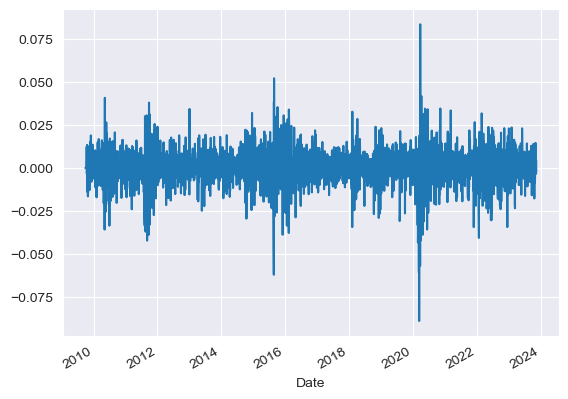

In [5]:
df.plot()

In [6]:
df

Date
2009-09-28    0.000000
2009-09-29    0.000000
2009-09-30    0.000000
2009-10-01    0.000000
2009-10-02    0.000000
                ...   
2023-11-06   -0.002663
2023-11-07    0.005862
2023-11-08   -0.003432
2023-11-09    0.004418
2023-11-10   -0.002393
Name: Adj Close, Length: 3619, dtype: float64

In [7]:
df_simulations=np.zeros((YEARS_OF_SIMULATION,NUMBER_OF_SIMULATIONS))
df_simulations[0,:]=STARTING_CAPITAL

for x in tqdm(range(0,NUMBER_OF_SIMULATIONS)):
    for i in range(1,YEARS_OF_SIMULATION):
        annual_change=1
        for k in range(Market_Days):
            annual_change=annual_change*(1+(secrets.choice(df.iloc[:])))
        df_simulations[i,x]=annual_change*df_simulations[i-1,x]
df_simulations= pd.DataFrame(df_simulations)
df_simulations_1=  pd.DataFrame(df_simulations)



  0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\dadoi\anaconda3\Lib\random.py:374: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return seq[self._randbelow(len(seq))]
100%|██████████| 1000/1000 [03:17<00:00,  5.07it/s]


In [8]:
df_simulations_1

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
1,12374.356501,13557.505948,11085.935569,10717.395398,11124.749700,12813.332621,11454.969142,11003.642513,8275.682047,10140.584393,...,9.800875e+03,10925.198767,14066.139619,11885.815598,12000.004278,15846.689896,10413.797090,8875.341269,10109.211586,10956.951002
2,11539.589159,17665.345757,10144.824103,12616.024598,8220.254846,11066.912276,11487.513001,10679.449962,9243.447317,9266.201665,...,1.177905e+04,14716.757570,11988.455698,14666.496164,12039.188328,16439.406420,10494.849516,7135.823025,11140.330248,13584.603899
3,10663.110456,15148.147606,11369.266117,14899.379156,10302.282506,13448.384959,15389.673093,10961.094132,9973.075447,11718.735494,...,1.456873e+04,17328.260156,14051.267794,16974.321044,12211.664021,19350.873050,9492.505918,7387.381321,13158.005874,19165.819743
4,13185.003651,13966.397720,11280.032386,15774.264644,12815.825197,13274.584608,13763.466519,12752.909080,10768.783615,13280.939593,...,1.517157e+04,20876.728129,17442.722137,15661.186848,16177.353346,24012.404752,9416.364825,8552.320908,16247.936078,18332.073921
5,13001.493785,14876.114635,12620.891210,14286.397864,12302.783931,18834.487964,15717.915877,14411.447540,12062.020077,16960.350204,...,2.261771e+04,24488.202096,20730.642049,20656.872967,18682.177989,22804.410842,9114.443936,8472.019752,16416.061259,13754.178342
6,10672.651285,14921.455402,13894.564717,21878.485631,15915.496614,18263.235511,20156.837837,13202.248298,15736.988127,18258.572083,...,2.869943e+04,27198.024501,20724.295689,22895.436359,23488.522780,19042.192159,8684.891287,8444.235589,19547.101608,13823.547650
7,9749.141449,19528.075148,16993.790794,18197.334866,17889.470608,21714.543178,27182.058438,17545.942916,18993.350362,21400.485550,...,4.150609e+04,29396.694633,22002.332919,22734.427439,28681.903623,21059.646453,9325.732670,8692.552470,24012.421921,15565.698173
8,10493.017905,17172.853087,23068.214673,21167.023219,14690.264338,20878.352218,25351.201797,21707.734837,22224.452167,21012.155492,...,4.347877e+04,34204.078163,20988.091092,22727.261752,38918.199737,21469.058576,11113.124284,11036.250184,25155.445956,21147.094202
9,15296.890401,15359.713252,22684.061039,25456.991221,18570.297064,16691.004768,28632.490845,22735.377708,23308.663683,23175.075538,...,7.165173e+04,40765.694809,16831.582938,24150.504205,40690.035033,21875.670342,13146.815249,15649.277902,25815.474790,21109.324894


In [9]:
df_simulations=df_simulations_1
df_simulations.iloc[YEARS_OF_SIMULATION-1]

0      147720.678433
1       81027.883465
2      120483.084795
3      123897.283134
4       57834.463037
           ...      
995    256886.776871
996    109171.829236
997    215792.851824
998    127871.989485
999    138561.355795
Name: 29, Length: 1000, dtype: float64

In [10]:
quantile=df_simulations.iloc[YEARS_OF_SIMULATION-1].quantile([0.1,0.9])
quantile=list(quantile)
print(quantile)
df_simulations_purged=df_simulations[df_simulations.columns[ df_simulations.max() < quantile[1]]]
df_simulations_purged=df_simulations_purged[df_simulations_purged.columns[ df_simulations_purged.max() > quantile[0]]]


[72428.53043444845, 638093.5202050379]


<Axes: title={'center': 'Simulation of 1000 portfolios'}>

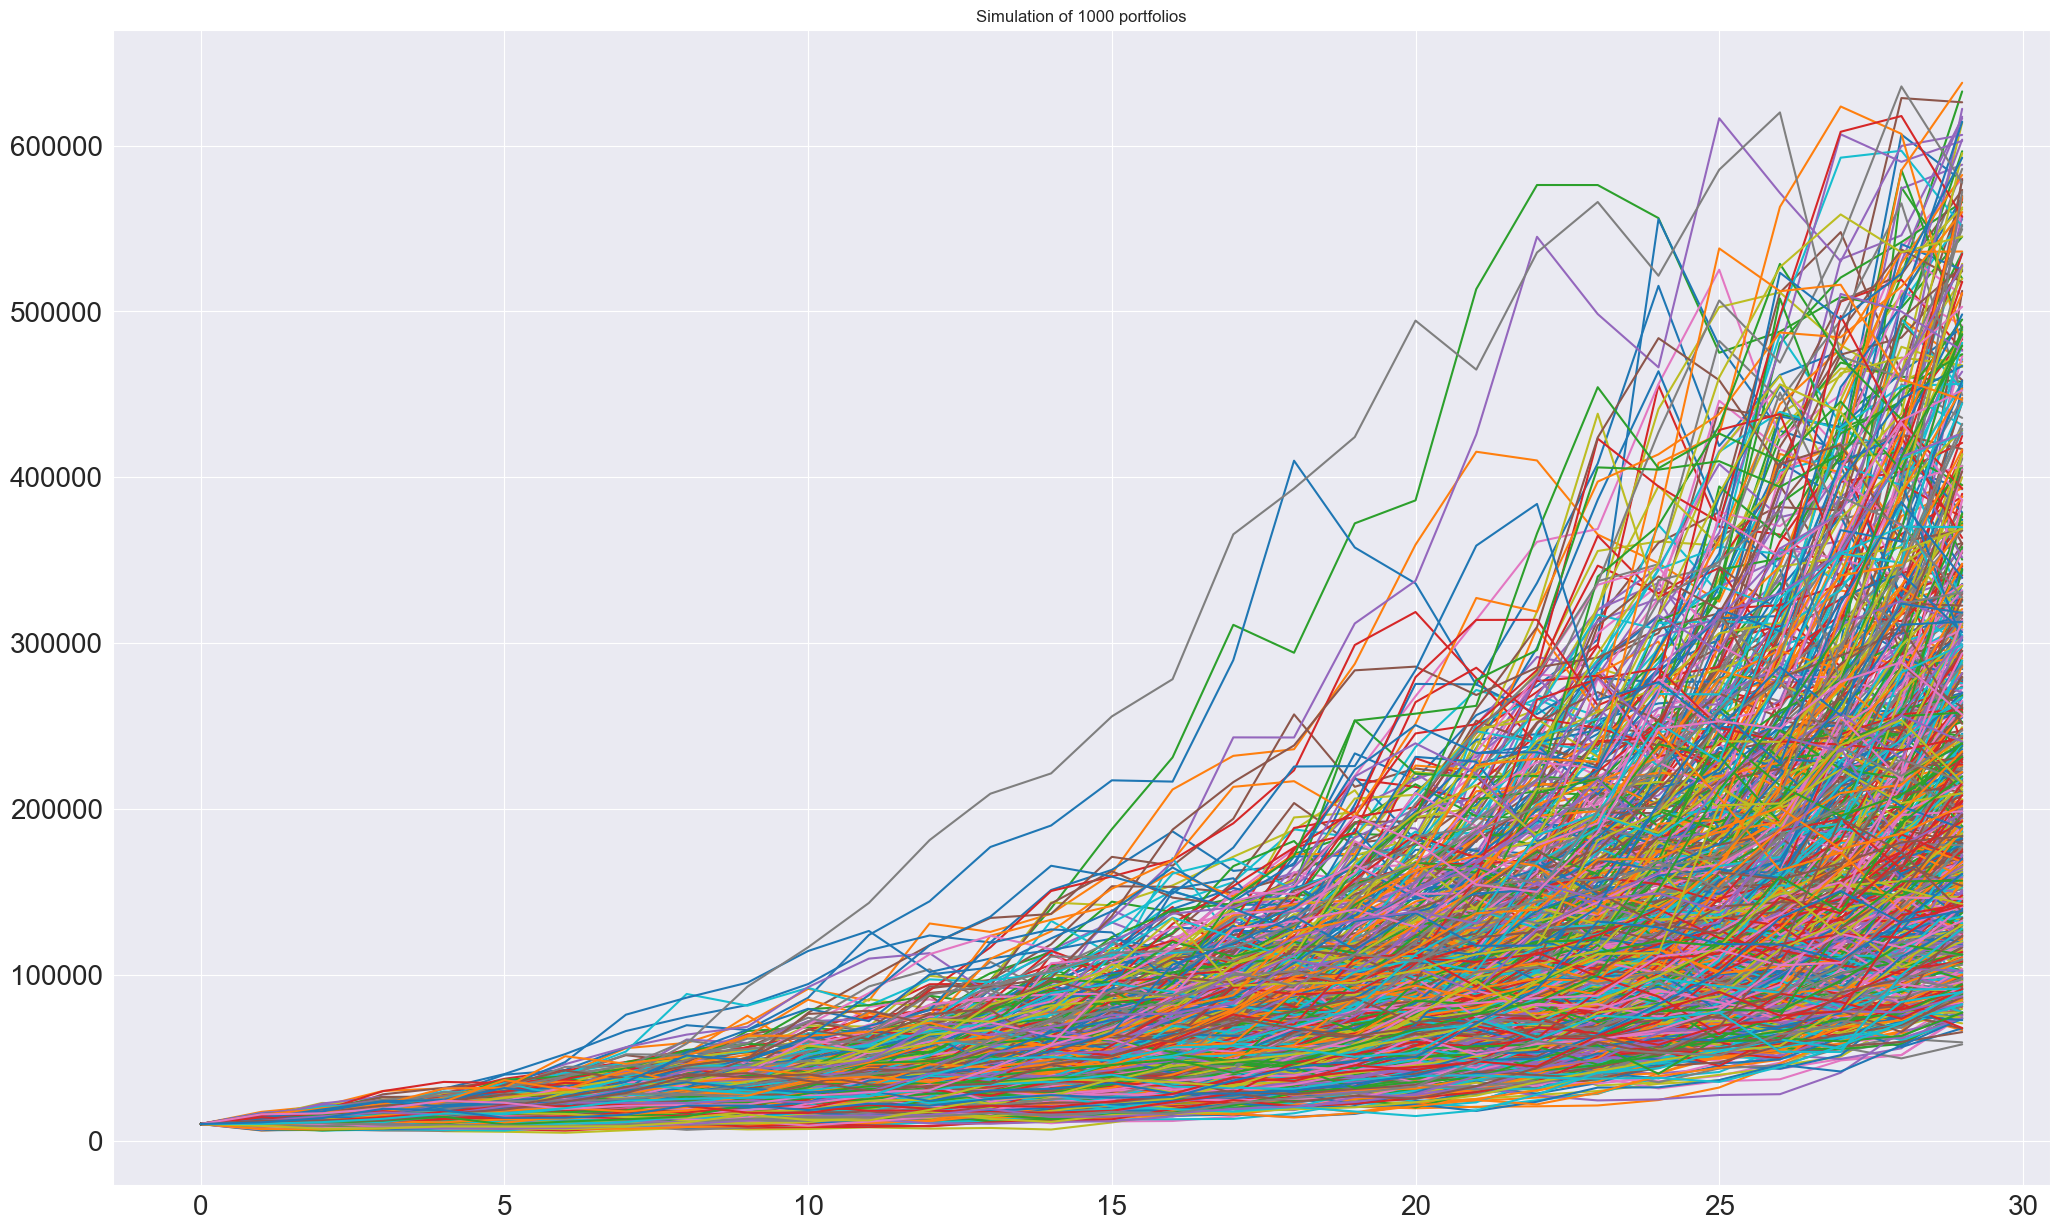

In [31]:
df_simulations_purged.plot(legend=None,logy=False,fontsize=20,figsize=(25,15),title=f"Simulation of {NUMBER_OF_SIMULATIONS} portfolios")

<Axes: ylabel='Density'>

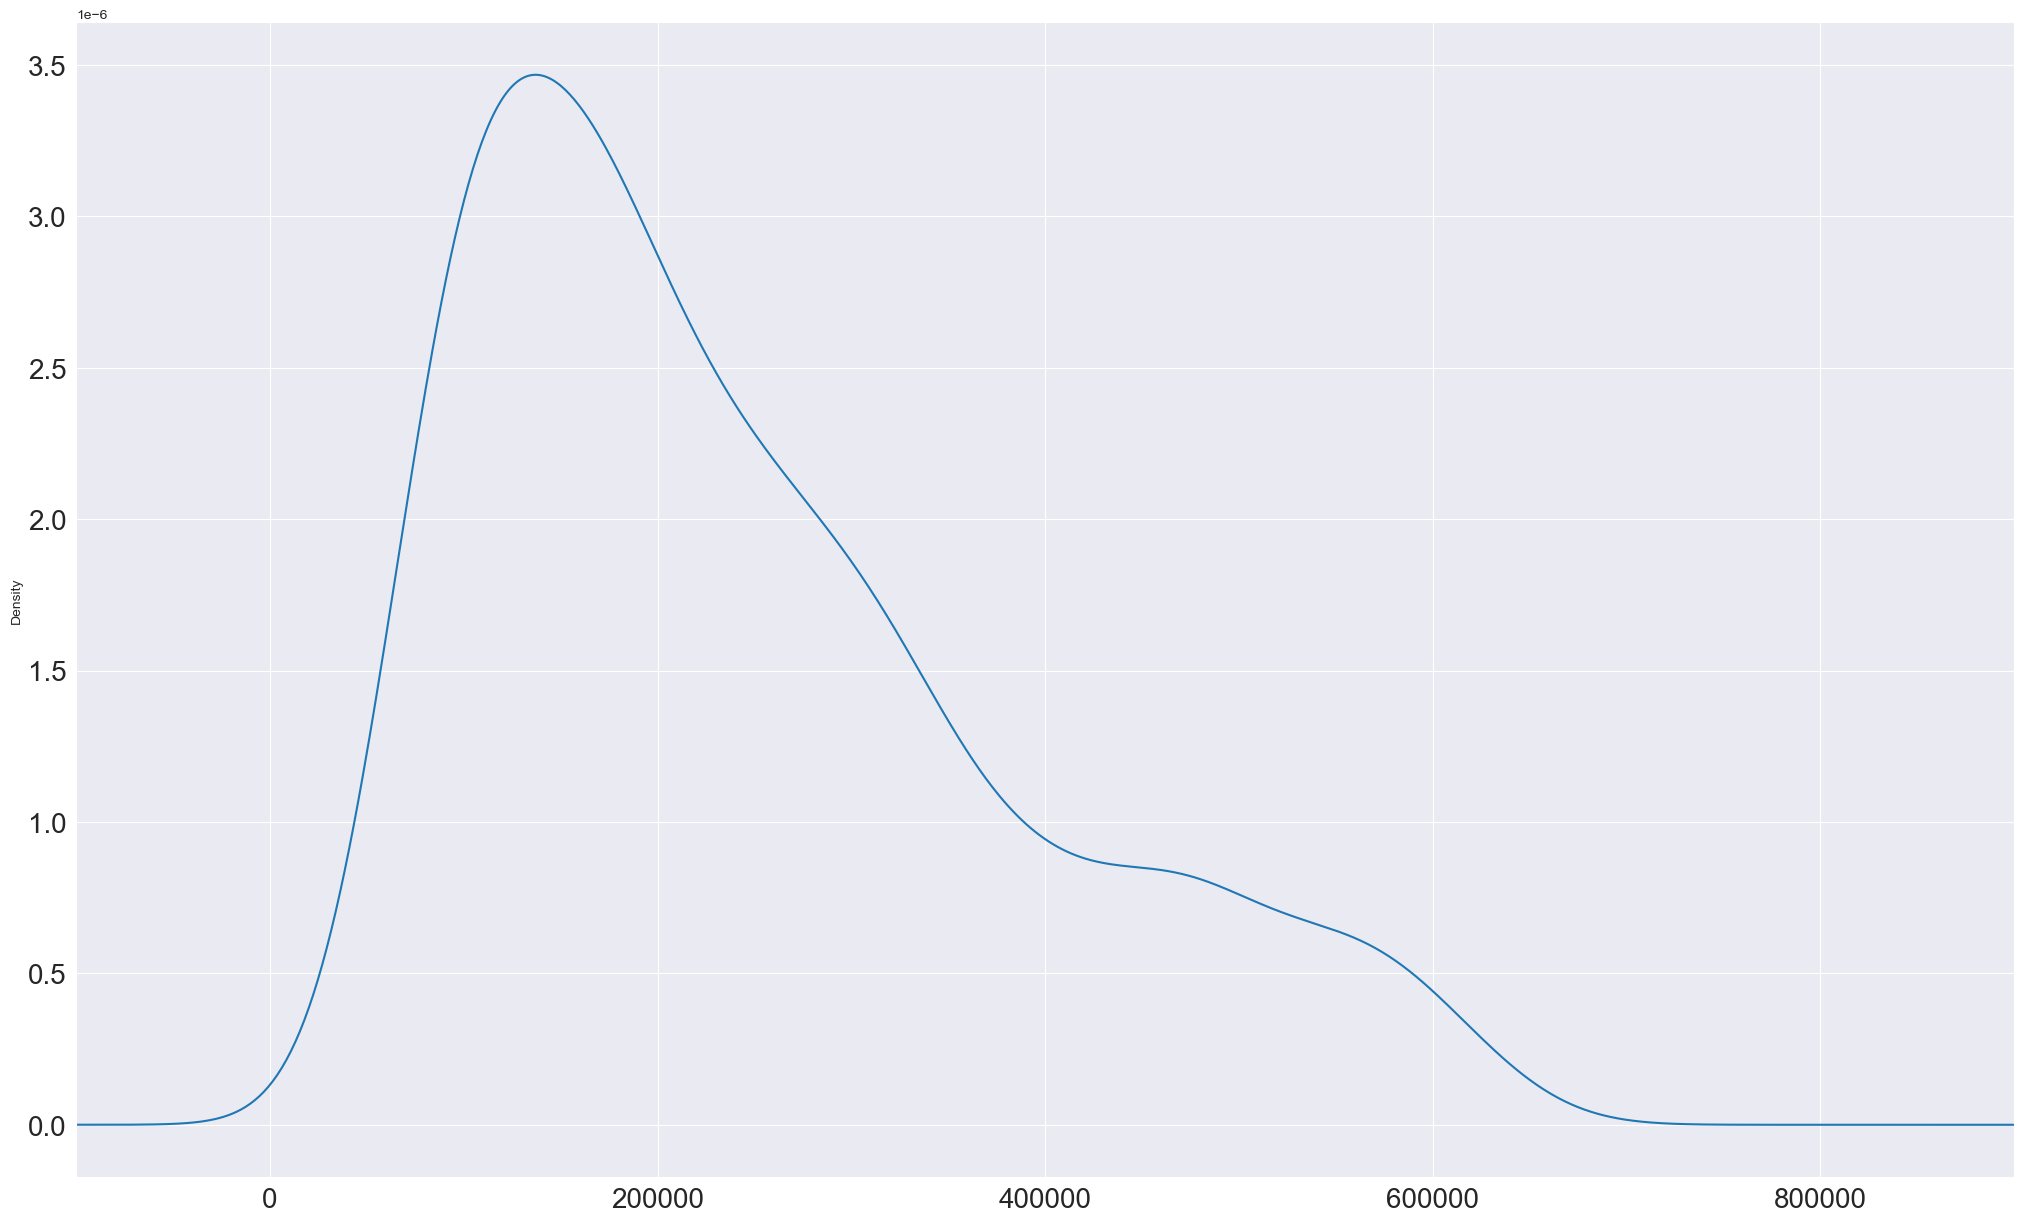

In [39]:
df_simulations_purged.iloc[YEARS_OF_SIMULATION-1].plot.density(figsize=(25,15),fontsize=20, xlim=(-100000,900000))

In [77]:
top_25 =[]
low_25 =[]
median=[]
for i in range(0,YEARS_OF_SIMULATION):
    top_25.append(df_simulations.iloc[i].quantile(0.75))
    low_25.append(df_simulations.iloc[i].quantile(0.25))
    median.append(df_simulations.iloc[i].median())
columns=["top_25","median","bottom_25"]
df_statistics=pd.DataFrame(list(zip(top_25,median,low_25)),columns=columns)
df_statistics
    
    





,top_25,median,bottom_25
0,10000.000000,10000.000000,10000.000000
1,12453.746675,11086.631807,10085.954403
2,14182.914367,12349.502709,10631.807076
3,16265.828340,13676.866873,11360.205672
4,19016.815440,15271.882868,12205.819771
5,21221.611492,16781.337904,13454.873305
6,24093.125953,18902.502176,14360.431095
7,27128.493970,20846.316066,15651.172380
8,30702.934676,23069.338128,17268.554051
9,34984.183950,25619.245356,18552.889874


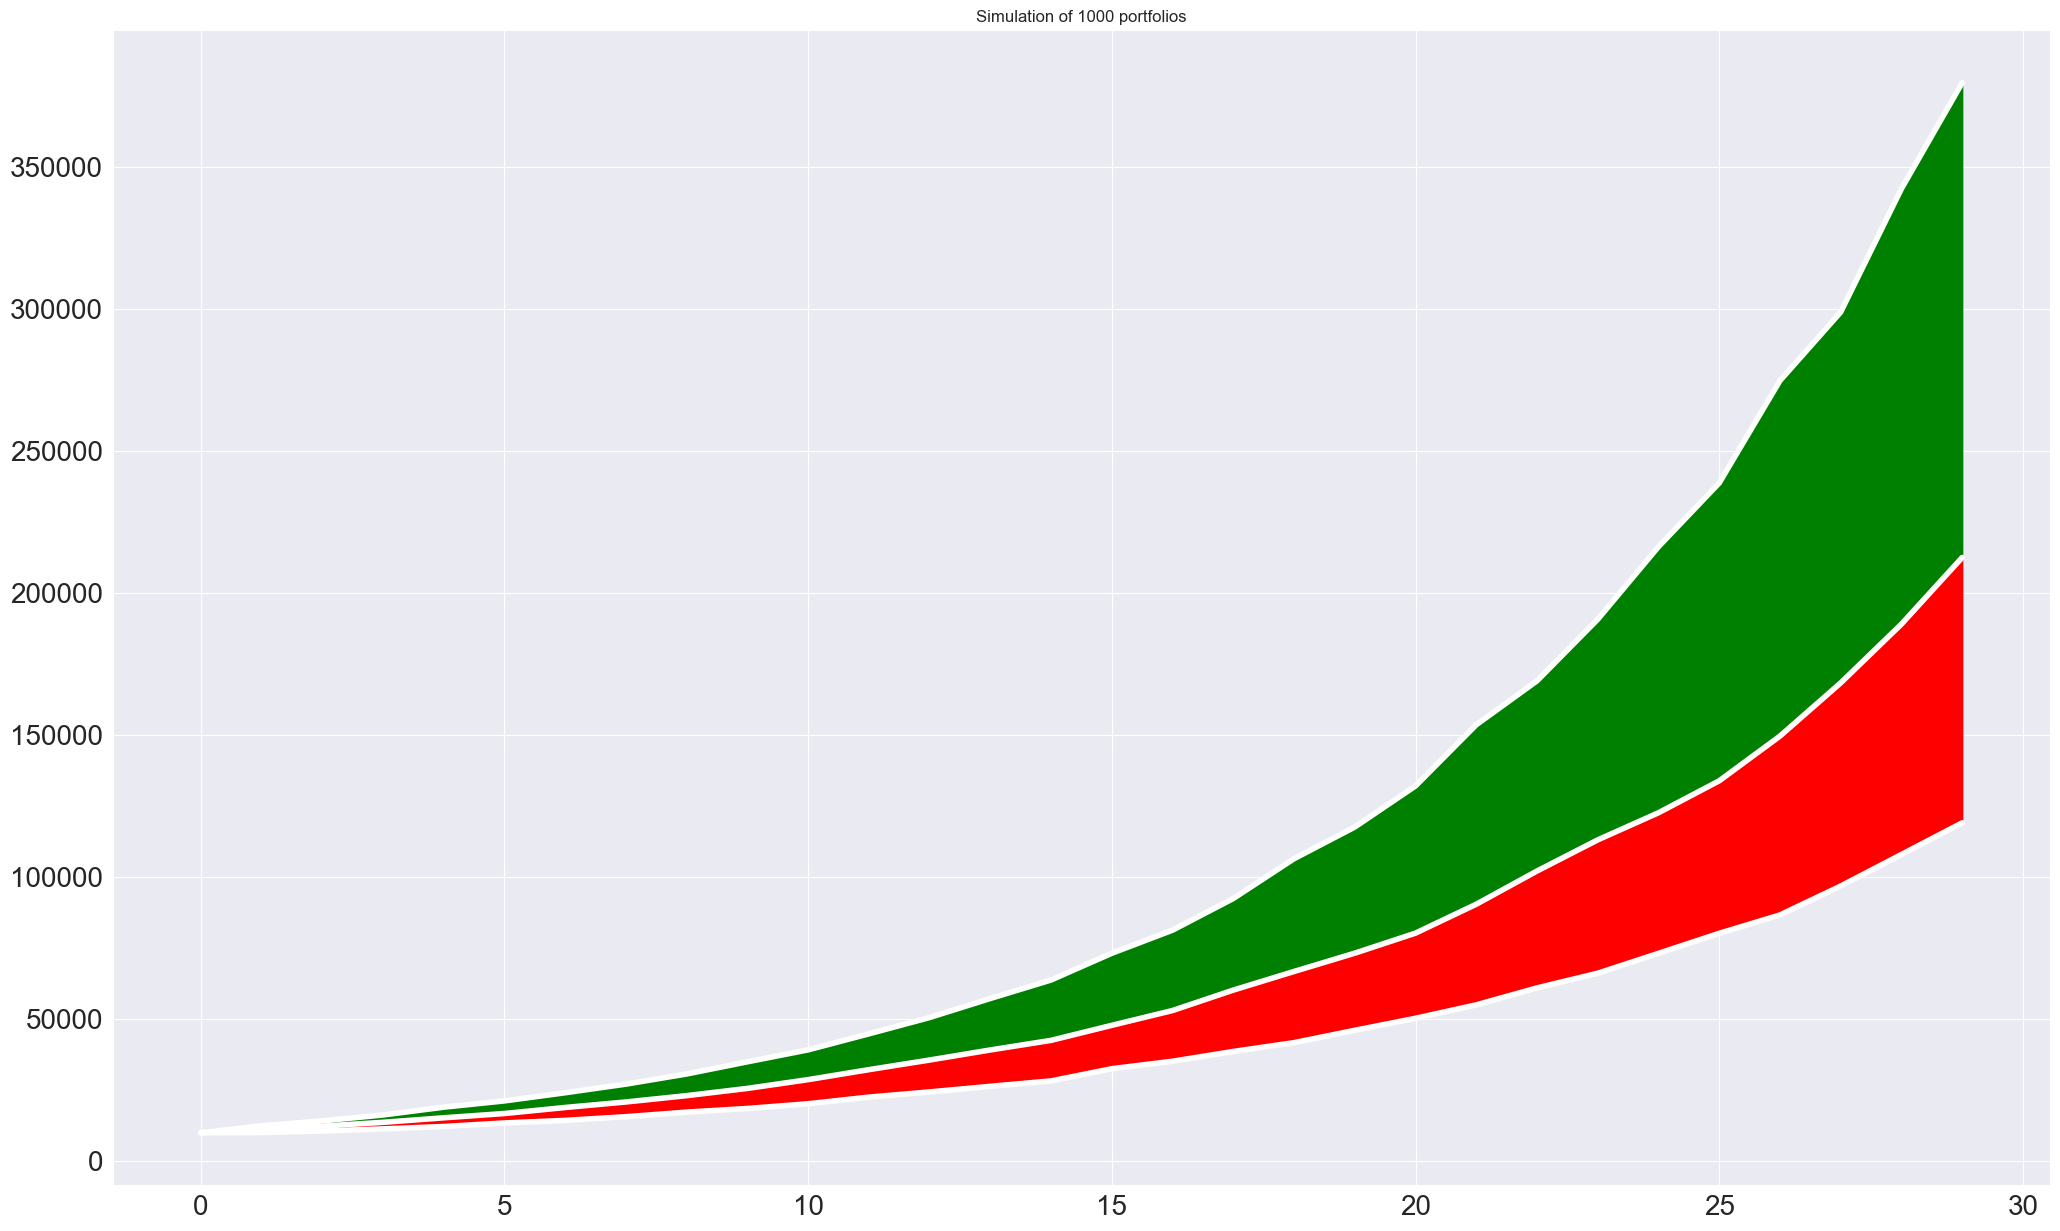

In [83]:
ax= df_statistics.plot(legend=None,logy=False,fontsize=20,figsize=(25,15),linewidth=4,color="white",title=f"Simulation of {NUMBER_OF_SIMULATIONS} portfolios")
ax.fill_between(df_statistics.index,df_statistics['top_25'], df_statistics['median'],color="green")
ax.fill_between(df_statistics.index,df_statistics['median'],df_statistics['bottom_25'] ,color="red")


In [84]:
!jupyter nbconvert --to html Portfolio1.ipynb

[NbConvertApp] Converting notebook Portfolio1.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 2712985 bytes to Portfolio1.html
